Lab Assignment 4: Generative Adversarial Network

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten
from keras.models import Model
from keras import backend as K
from keras.utils.vis_utils import plot_model
from matplotlib import pyplot
import time

In [2]:
# 1. Import and load the 'fashion_mnist' dataset from TensorFlow

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [3]:
# Using 2 dictionaries with keys 'images' and 'labels', store the fashion_mnist datasets into ds1_firstname(60000) and ds2_firstname(10000)

ds1_jefil = {"images" : train_images, "labels" : train_labels}
ds2_jefil = {"images" : test_images, "labels" : test_labels}

In [4]:
# Display the size 

print(len(ds1_jefil['images']))
print(len(ds1_jefil['labels']))

print(len(ds2_jefil['images']))
print( len(ds2_jefil['labels']))

60000
60000
10000
10000


In [5]:
#b. Data Pre-preprocessing
# 1. Normalize the pixal values in the dataset to a range between -1 to 1.

# The pixel data ranges from 0 to 255 hence dividing each pixel by 255,i.e,normalizing the data such that the range is within 0 to 1
ds1_jefil['images'] = ds1_jefil['images'] / 255.0
ds2_jefil['images'] = ds2_jefil['images'] / 255.0

ds1_jefil['images'] = ds1_jefil['images']*2 - 1
ds2_jefil['images'] = ds2_jefil['images']*2 - 1

In [6]:
print('Ds2_jefil: ',ds2_jefil['images'].min(), 'Ds1_jefil: ', ds1_jefil['images'].max())

Ds2_jefil:  -1.0 Ds1_jefil:  1.0


In [7]:
# 2. Display (print) the shape of the train_firstname['images'], test_firstname['images']

print("Shape of ds1_jefil['images']", ds1_jefil['images'].shape)
print("Shape of ds2_jefil['images']", ds2_jefil['images'].shape)

Shape of ds1_jefil['images'] (60000, 28, 28)
Shape of ds2_jefil['images'] (10000, 28, 28)


In [8]:
# 3. Using np.concatenate, create a new dataset named dataset_firstname. 
index_ds1 = np.where(ds1_jefil['labels'] == 1)[0]

idx = list(index_ds1) #Converted into list
pant_ds1 = ds1_jefil['images'][idx]  ##Fetching images that consist pants

index_ds2 = np.where(ds2_jefil['labels'] == 1)[0]

idx = list(index_ds2)
pant_ds2 = ds2_jefil['images'][idx] ##Fetching images that consist pants

dataset_jefil = np.concatenate((pant_ds1, pant_ds2), axis=0)

In [9]:
# 4. Display (print) the shape of the dataset

print(dataset_jefil.shape)

(7000, 28, 28)


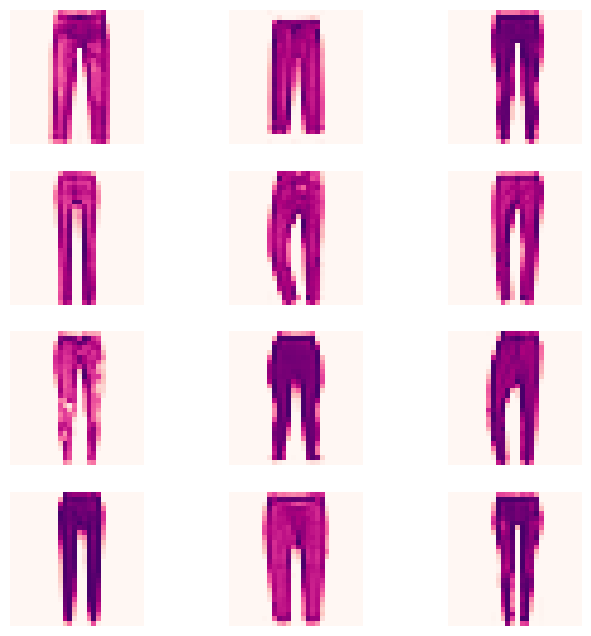

In [10]:
# 5. Display (plot) the first 12 images from the dataset using matplotlip. Remove xticks and yticks when plotting the image. 

# plot images from the dataset

pyplot.figure(figsize=(8,8))
for i in range(12):
	# define subplot
	pyplot.subplot(4, 3, 1 + i)
	# turn off axis
	pyplot.axis('off')
	# plot raw pixel data
	pyplot.imshow(dataset_jefil[i], cmap=pyplot.get_cmap('RdPu'))
pyplot.show()


In [11]:

# 6. Using Tensorflow's Dataset from_tensor_slices(), shuffle(), and batch create training dataset called train_dataset_firstname from the dataset_firstname. 
# The training dataset will shuffle all 7000 images and have a batch size of 256.

BUFFER = 7000
BATCHSIZE = 256
LATENT_DIM = 100

In [12]:
train_dataset_jefil = (tf.data.Dataset.from_tensor_slices(dataset_jefil).shuffle(BUFFER).batch(BATCHSIZE))

In [13]:
#c. Build the Generator Model of the GAN
# 1. Use TensorFlow's Sequential() to build a CNN model with the following architecture:

generator_model_jefil = Sequential(name = 'generator_model_jefil')
generator_model_jefil.add(layers.Dense(7 * 7 * 256, input_dim=LATENT_DIM))
generator_model_jefil.add(layers.BatchNormalization())
generator_model_jefil.add(layers.LeakyReLU())
generator_model_jefil.add(layers.Reshape((7, 7, 256)))
generator_model_jefil.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
generator_model_jefil.add(layers.BatchNormalization())
generator_model_jefil.add(layers.LeakyReLU())    
generator_model_jefil.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
generator_model_jefil.add(layers.BatchNormalization())
generator_model_jefil.add(layers.LeakyReLU())
generator_model_jefil.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

In [14]:
# 2. Display (print) a summary of the model using summary().
generator_model_jefil.summary()

Model: "generator_model_jefil"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12544)             1266944   
                                                                 
 batch_normalization (BatchN  (None, 12544)            50176     
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 12544)             0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 7, 7, 128)        819200    
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 12

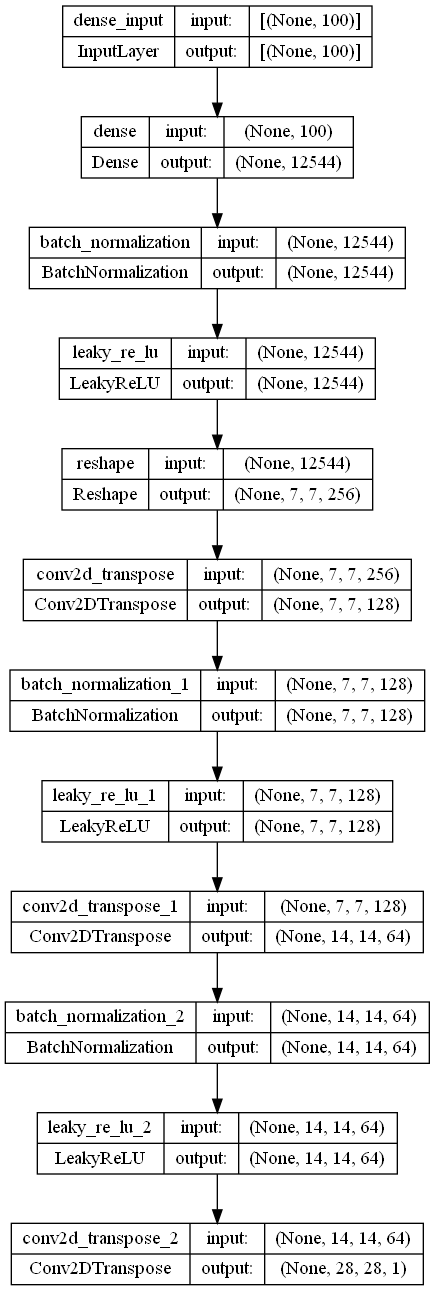

In [15]:
tf.keras.utils.plot_model(generator_model_jefil, to_file='generator_model_jefil.png', show_shapes=True)


In [16]:
#d. Sample untrained generator
# 1. Using Tensorflow's random.normal(), create a sample vector with dimension size 100.
noise = tf.random.normal([1, 100])

In [17]:
# 2. Generate an image from generator_model_firstname. Ensure training is disabled.
image = generator_model_jefil(noise, training=False)

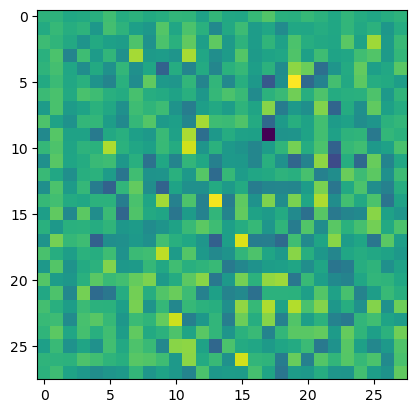

In [18]:
# 3. Display (plot) the generated image using matplot lib.
pyplot.imshow(image[0, :, :, 0])

In [19]:
#e. Build the Discriminator Model of the GAN
# 1. Use TensorFlow's Sequential() to build a CNN model with the following architecture:

input_shape=[28, 28, 1]
discriminator_model_jefil = Sequential(name = 'discriminator_model_jefil')
discriminator_model_jefil.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=input_shape))
discriminator_model_jefil.add(layers.LeakyReLU())
discriminator_model_jefil.add(layers.Dropout(0.3))
discriminator_model_jefil.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
discriminator_model_jefil.add(layers.LeakyReLU())
discriminator_model_jefil.add(layers.Dropout(0.3))
discriminator_model_jefil.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
discriminator_model_jefil.add(layers.BatchNormalization())
discriminator_model_jefil.add(layers.LeakyReLU()) 
discriminator_model_jefil.add(layers.Flatten())
discriminator_model_jefil.add(layers.Dense(1))

In [20]:
# 2. Display (print) a summary of the model using summary().
discriminator_model_jefil.summary()

Model: "discriminator_model_jefil"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        1664      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 14, 

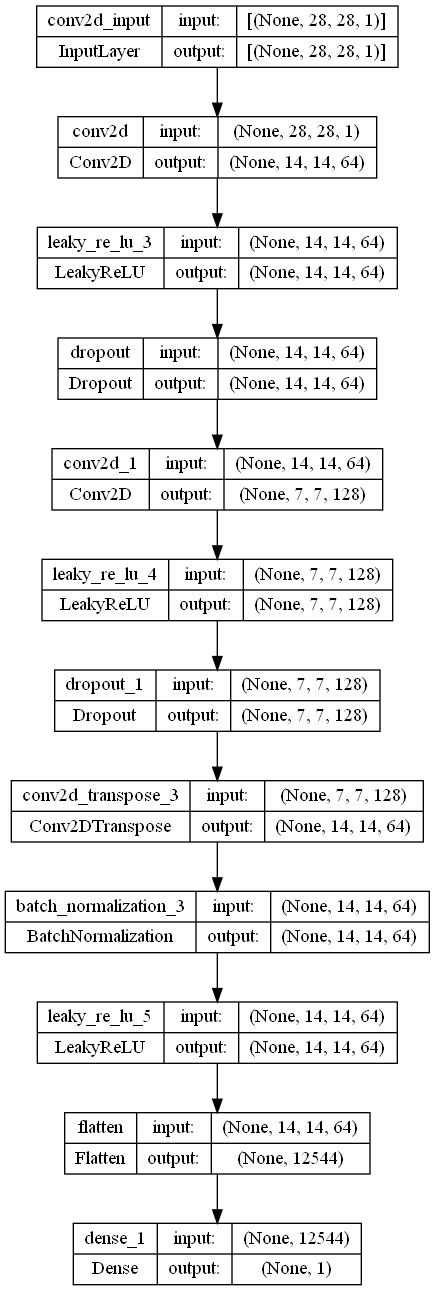

In [21]:
tf.keras.utils.plot_model(discriminator_model_jefil, to_file='discriminator_model_jefil.png', show_shapes=True)

In [22]:
# 1. Create a loss function using Tensorflow's BinaryCrossentropy() and call it cross_entropy_firstname. Make sure to set from_logits=True.
# This loss function will be used to calculate the loss for the generator and discriminator.

cross_entropy_jefil = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [23]:
# 2. Using Tensorflow's optimizers, create a generator and discriminator optimizer.
# Both optimizers will use Adam optimizers and should have the name generator_optimizer_firstname and discriminator_optimizer_firstname respectively.

generator_optimizer_jefil = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer_jefil = tf.keras.optimizers.Adam(1e-4)

In [24]:
# 3. Create a tensorflow function using tf.function and call it training_step.
# The function takes a batch of images as input and updates the discriminator and generator using the optimizer
# and calculating the gradients from the calculated the losses.

@tf.function
def training_step(images):
    noise = tf.random.normal([BATCHSIZE, LATENT_DIM])


    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator_model_jefil(noise, training=True)

      real_output = discriminator_model_jefil(images, training=True)
      fake_output = discriminator_model_jefil(generated_images, training=True)

      gen_loss = cross_entropy_jefil(tf.ones_like(fake_output), fake_output)
      real_loss = cross_entropy_jefil(tf.ones_like(real_output), real_output)
      fake_loss = cross_entropy_jefil(tf.zeros_like(fake_output), fake_output)
      disc_loss = real_loss + fake_loss

    gradients_of_generator = gen_tape.gradient(gen_loss, generator_model_jefil.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator_model_jefil.trainable_variables)

    generator_optimizer_jefil.apply_gradients(zip(gradients_of_generator, generator_model_jefil.trainable_variables))
    discriminator_optimizer_jefil.apply_gradients(zip(gradients_of_discriminator, discriminator_model_jefil.trainable_variables))


In [25]:
#g  Using the train_dataset_firstname from Step b.6 and the training function defined in Step f.3, 
#train the models in batches with 10 epochs.

from IPython import display
import matplotlib.pyplot as plt

def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      training_step(image_batch)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))



In [31]:
#h. Visualized Trained Generator

EPOCHS = 10
noise_dim = 100
num_examples_to_generate = 16
seed = tf.random.normal([num_examples_to_generate, noise_dim])


train(train_dataset_jefil, EPOCHS)

Time for epoch 1 is 38.85804629325867 sec
Time for epoch 2 is 36.80810594558716 sec
Time for epoch 3 is 38.73396301269531 sec
Time for epoch 4 is 38.56556248664856 sec
Time for epoch 5 is 32.058876037597656 sec
Time for epoch 6 is 22.29990792274475 sec
Time for epoch 7 is 21.89940571784973 sec
Time for epoch 8 is 21.342928409576416 sec
Time for epoch 9 is 21.18036389350891 sec
Time for epoch 10 is 21.26543927192688 sec


In [32]:
def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(8,8))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5)
        plt.axis('off')
    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

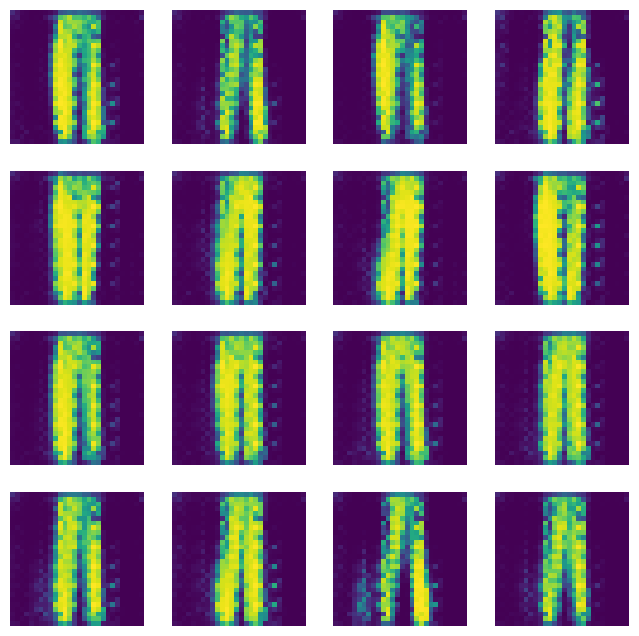

In [33]:
# Generate after the final epoch
display.clear_output(wait=True)
generate_and_save_images(generator_model_jefil,
                           EPOCHS,
                           seed)